## Clustering

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift
from sklearn.model_selection import train_test_split

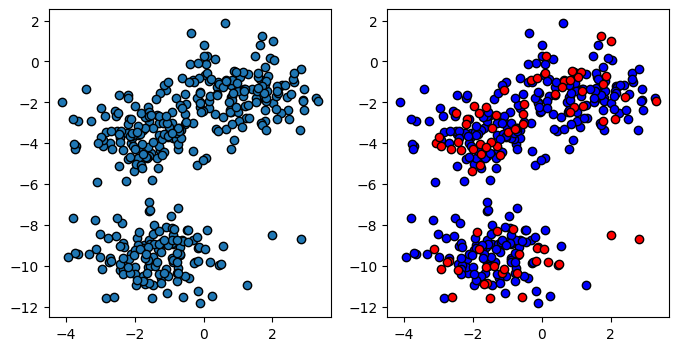

In [ ]:
X , y = make_blobs(n_samples = 400, n_features = 2, random_state=2) #, centers = clusters

X_train, X_test,_,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

_, axes = plt.subplots(1,2,figsize = (8,4))
axes[0].scatter(X[:, 0], X[:, 1], marker ='o',edgecolors='k')
axes[1].scatter( X_train[:, 0],X_train[:, 1], c='b',edgecolors='k')
axes[1].scatter( X_test[:, 0],X_test[:, 1], c='r',edgecolors='k')
plt.show()

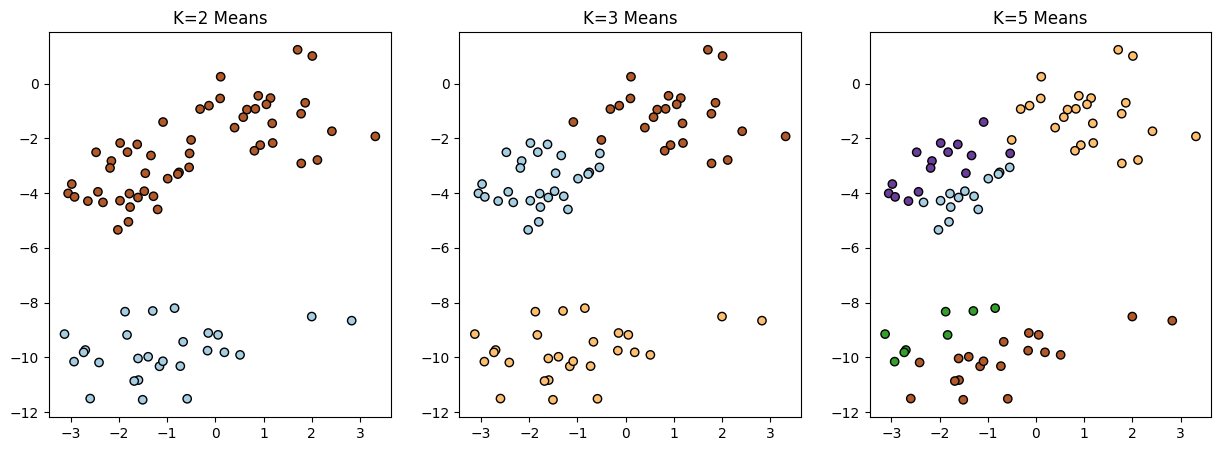

In [ ]:
models = [KMeans(n_clusters=2),KMeans(n_clusters=3),KMeans(n_clusters=5)]
names =['K=2 Means','K=3 Means','K=5 Means']

_, axes = plt.subplots(1, 3, figsize = (15,5))
predictions = {}

# fit the model
for model, name, ax in zip(models,names,axes) :
  # Instance and train
    model.fit(X_train)
  # Predictions on train and test sets
    predictions[name] = model.predict(X_test)

  # Plot everything
    ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions[name], edgecolors='k', cmap='Paired')
    ax.set_title(name)



# plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [ ]:
## Scores for training data

for name in names :
  print ("########----- Results for {0} -----########".format( name ))
  ari = adjusted_rand_score( y_test , predictions[name] )
  ami = adjusted_mutual_info_score( y_test , predictions[name] )
  sil = silhouette_score( X_test , predictions[name] )
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL--0")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for K=2 Means -----########
-- ARI --	 -- AMI --	 -- SIL--0
  0.577  	   0.734  	   0.657  	
########----- Results for K=3 Means -----########
-- ARI --	 -- AMI --	 -- SIL--0
  0.927  	   0.916  	   0.600  	
########----- Results for K=5 Means -----########
-- ARI --	 -- AMI --	 -- SIL--0
  0.658  	   0.738  	   0.379  	


## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()